In [47]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

In [5]:
#apple_july_23.to_csv('apple_july_23')

In [6]:
data = yf.download('GOLD', start="2000-01-01", end="2023-07-30", interval='1d')
data.index = pd.to_datetime(data.index)
data = data.resample("M").last()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

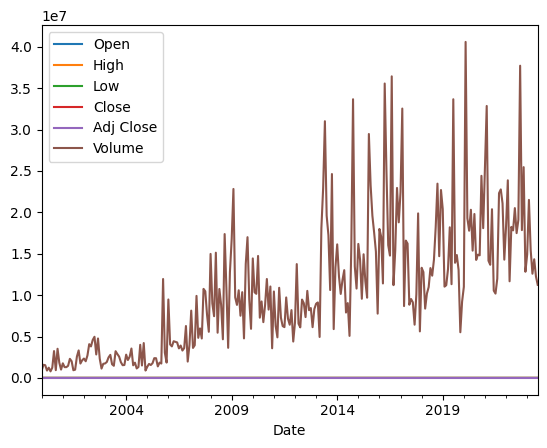

In [7]:
data.plot()

In [8]:
data.to_csv('etf_gold')

In [61]:
sp500 = yf.download('^GSPC', start="2000-01-01", end="2023-07-30", interval='1d')
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [62]:
sp500.to_csv('sp500_data')

In [11]:
dollar_index = yf.download('DXY', start="2000-01-01", end="2023-07-30", interval='1d')
dollar_index.index = pd.to_datetime(dollar_index.index)
dollar_index = dollar_index.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [12]:
dollar_index.to_csv('dollar_index')

In [13]:
bond_yield_30 = yf.download('^TYX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_30.index = pd.to_datetime(bond_yield_30.index)
bond_yield_30 = bond_yield_30.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [14]:
bond_yield_30.to_csv('30_yr_bond')

In [15]:
bond_yield_10 = yf.download('^TNX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_10.index = pd.to_datetime(bond_yield_10.index)
bond_yield_10 = bond_yield_10.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [16]:
bond_yield_10.to_csv('10_yr_bond')

In [17]:
bond_yield_5 = yf.download('^FVX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_5.index = pd.to_datetime(bond_yield_5.index)
bond_yield_5 = bond_yield_5.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [18]:
bond_yield_5.to_csv('5_yr_bond')

In [19]:
bond_yield_13w = yf.download('^IRX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_13w.index = pd.to_datetime(bond_yield_13w.index)
bond_yield_13w = bond_yield_13w.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [20]:
bond_yield_13w.to_csv('13_wk_bond')

In [21]:
sp500.index = pd.to_datetime(sp500.index)
monthly_data = sp500.resample("M").last()


In [22]:
liquidpath = Path("corporate_liquidity.csv")
liquid_df = pd.read_csv(liquidpath, parse_dates=True, index_col="date", infer_datetime_format=True)

In [23]:
walclpath = Path('total_assets.csv')
assets_df = pd.read_csv(walclpath, parse_dates=True, index_col="date", infer_datetime_format=True)

In [24]:
liquidity_assets = pd.concat([liquid_df, assets_df], axis=1, join='inner')
liquidity_assets

corporate_liquidity  total_assets
date                                         
2003-01-01            1969596.0      724718.0
2003-04-01            2134969.0      736926.0
2003-07-01            2171395.0      741656.0
2003-10-01            2274243.0      747068.0
2004-01-01            2324355.0      759938.0
...                         ...           ...
2022-01-01            6935871.0     8820580.0
2022-04-01            6189642.0     8949532.0
2022-07-01            6006974.0     8894234.0
2022-10-01            6324169.0     8746259.0
2023-01-01            6498217.0     8493903.0

[81 rows x 2 columns]

<AxesSubplot:>

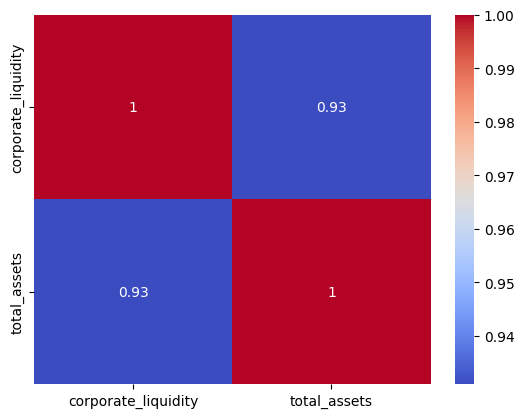

In [25]:
corr_matrix = liquidity_assets.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [26]:
rate_path = Path('effective_rate.csv')
effective_rate = pd.read_csv(rate_path, parse_dates=True, index_col="date", infer_datetime_format=True)
effective_rate

effective_rate
date                      
1954-07-01            0.80
1954-08-01            1.22
1954-09-01            1.07
1954-10-01            0.85
1954-11-01            0.83
...                    ...
2023-03-01            4.65
2023-04-01            4.83
2023-05-01            5.06
2023-06-01            5.08
2023-07-01            5.12

[829 rows x 1 columns]

In [27]:
effective_liquidity = pd.concat([liquid_df, effective_rate], axis=1, join='inner')
effective_liquidity

corporate_liquidity  effective_rate
date                                           
1954-07-01              45623.0            0.80
1954-10-01              48373.0            0.85
1955-01-01              47075.0            1.39
1955-04-01              47332.0            1.43
1955-07-01              49775.0            1.68
...                         ...             ...
2022-01-01            6935871.0            0.08
2022-04-01            6189642.0            0.33
2022-07-01            6006974.0            1.68
2022-10-01            6324169.0            3.08
2023-01-01            6498217.0            4.33

[275 rows x 2 columns]

<AxesSubplot:>

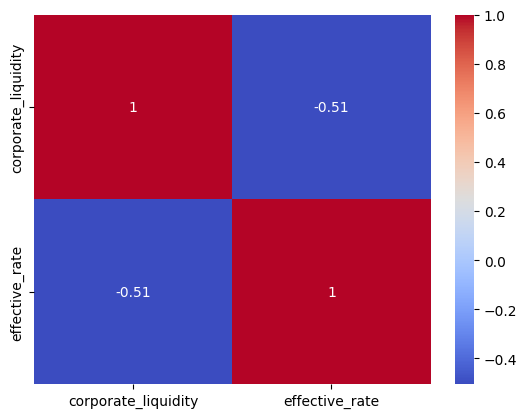

In [28]:
corr_matrix = effective_liquidity.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [50]:
condopath = Path('city_condo_smoothed_by_date.csv')
condos = pd.read_csv(condopath)
columns_to_select = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
condos = condos.iloc[:, columns_to_select]

In [68]:
condos

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas  
0    217916.040239   93906.833661  
1    218923.103357   93968.439991  
2    220075.230069   94002.823251  
3    222681.763640   94118.669283  
4    225453.301006   94319.615262  
..             ...            ...  
277  915736.250391  311809.279260  
278  915980.415824  311597.388822  
279  920086.263076  311136.937680  
280  927256.147270  311215.969480  
281  937452.776699  311880.260441  

[282 rows x 11 columns]

In [30]:
bond_yield_30.reset_index(inplace=True)

In [31]:
condos_by_bond = pd.concat([bond_yield_30, condos], axis=1, join='inner')


Date   Open   High    Low  Close  Adj Close  Volume        date  \
0   2000-01-31  6.483  6.493  6.431  6.491      6.491       0  2000-01-31   
1   2000-02-29  6.185  6.187  6.130  6.133      6.133       0  2000-02-29   
2   2000-03-31  5.884  5.893  5.829  5.846      5.846       0  2000-03-31   
3   2000-04-30  6.012  6.019  5.934  5.962      5.962       0  2000-04-30   
4   2000-05-31  6.072  6.072  6.001  6.017      6.017       0  2000-05-31   
..         ...    ...    ...    ...    ...        ...     ...         ...   
277 2023-02-28  3.956  3.978  3.921  3.931      3.931       0  2023-02-28   
278 2023-03-31  3.738  3.745  3.688  3.689      3.689       0  2023-03-31   
279 2023-04-30  3.705  3.717  3.665  3.678      3.678       0  2023-04-30   
280 2023-05-31  3.865  3.903  3.852  3.856      3.856       0  2023-05-31   
281 2023-06-30  3.906  3.917  3.849  3.855      3.855       0  2023-06-30   

          New York    Los Angeles  ...    Norwood.10         Cove.2  \
0    140391.981926  218490.626872  ...           NaN            NaN   
1    141145.122836  218799.511982  ...           NaN            NaN   
2    141909.677580  219746.146365  ...           NaN            NaN   
3    143388.189791  221629.705836  ...           NaN            NaN   
4    144872.164609  223998.145277  ...           NaN            NaN   
..             ...            ...  ...           ...            ...   
277  678282.653622  931763.389476  ...  97955.871024  323378.717129   
278  682910.901887  920231.020434  ...  98831.669881  326099.059647   
279  690942.081845  914510.903613  ...  98622.464564  329718.985139   
280  702490.656340  915677.727358  ...  98894.927631  332942.958008   
281  716097.351816  922548.036229  ...  99235.245759  336186.452577   

           Mesilla  Stirling City    Ellenton.1     Jumpertown     Dollar Bay  \
0              NaN            NaN           NaN            NaN            NaN   
1              NaN            NaN           NaN            NaN            NaN   
2              NaN            NaN           NaN            NaN            NaN   
3              NaN            NaN           NaN            NaN            NaN   
4              NaN            NaN           NaN            NaN            NaN   
..             ...            ...           ...            ...            ...   
277  303524.171317  154881.062738  31252.761878  107592.049109  149769.000577   
278  302263.655950  156126.131107  32937.388102  110327.070977  149425.061100   
279  311153.370566  158978.462973  34073.151497  111997.621610  145534.529881   
280  319584.760065  160887.848724  35483.230707  113693.792770  142903.116277   
281  323972.215756  160228.037302  36014.411505  113835.003197  140997.506759   

       Fort Howard    Hoisington    Martin City  
0              NaN           NaN            NaN  
1              NaN           NaN            NaN  
2              NaN           NaN            NaN  
3              NaN           NaN            NaN  
4              NaN           NaN            NaN  
..             ...           ...            ...  
277  303684.949546  75960.160674  540775.830811  
278  306253.269685  74411.647837  538732.138109  
279  307604.027134  73156.560843  536258.455566  
280  310065.140058  73238.169511  534941.150768  
281  313000.781347  73892.548761  538119.953088  

[282 rows x 22259 columns]

In [ ]:
condos_by_bond = condos_by_bond.drop(['date', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

Date   Open       New York    Los Angeles        Houston  \
0   2000-01-31  6.483  140391.981926  218490.626872   98805.723619   
1   2000-02-29  6.185  141145.122836  218799.511982   98779.276115   
2   2000-03-31  5.884  141909.677580  219746.146365   98641.818356   
3   2000-04-30  6.012  143388.189791  221629.705836   98597.642929   
4   2000-05-31  6.072  144872.164609  223998.145277   98579.734704   
..         ...    ...            ...            ...            ...   
277 2023-02-28  3.956  678282.653622  931763.389476  264551.198302   
278 2023-03-31  3.738  682910.901887  920231.020434  263822.415637   
279 2023-04-30  3.705  690942.081845  914510.903613  263627.658306   
280 2023-05-31  3.865  702490.656340  915677.727358  263897.802873   
281 2023-06-30  3.906  716097.351816  922548.036229  264539.685482   

           Chicago    San Antonio   Philadelphia        Phoenix  \
0    124245.408935   97829.737112   56916.850432  117244.930193   
1    124280.127900   97921.501155   57034.454029  117531.522392   
2    124596.274473   97991.762941   57148.221328  117898.820920   
3    125397.904848   98117.809185   57401.218845  118683.045315   
4    126469.999364   97666.735377   57786.646407  119551.547662   
..             ...            ...            ...            ...   
277  285628.744382  264757.308479  224143.910288  414274.122613   
278  287352.697452  264936.990469  223952.402939  412505.064527   
279  287809.867413  264950.972541  222952.017708  411231.178233   
280  288596.320660  265106.964969  222663.955101  411080.521691   
281  290377.564895  265321.957844  223044.434618  412402.439701   

         Las Vegas  ...    Norwood.10         Cove.2        Mesilla  \
0    160666.547217  ...           NaN            NaN            NaN   
1    160640.225524  ...           NaN            NaN            NaN   
2    160903.485085  ...           NaN            NaN            NaN   
3    161517.240796  ...           NaN            NaN            NaN   
4    162323.675727  ...           NaN            NaN            NaN   
..             ...  ...           ...            ...            ...   
277  399410.001777  ...  97955.871024  323378.717129  303524.171317   
278  396527.489865  ...  98831.669881  326099.059647  302263.655950   
279  395094.535695  ...  98622.464564  329718.985139  311153.370566   
280  394681.241515  ...  98894.927631  332942.958008  319584.760065   
281  395714.657308  ...  99235.245759  336186.452577  323972.215756   

     Stirling City    Ellenton.1     Jumpertown     Dollar Bay    Fort Howard  \
0              NaN           NaN            NaN            NaN            NaN   
1              NaN           NaN            NaN            NaN            NaN   
2              NaN           NaN            NaN            NaN            NaN   
3              NaN           NaN            NaN            NaN            NaN   
4              NaN           NaN            NaN            NaN            NaN   
..             ...           ...            ...            ...            ...   
277  154881.062738  31252.761878  107592.049109  149769.000577  303684.949546   
278  156126.131107  32937.388102  110327.070977  149425.061100  306253.269685   
279  158978.462973  34073.151497  111997.621610  145534.529881  307604.027134   
280  160887.848724  35483.230707  113693.792770  142903.116277  310065.140058   
281  160228.037302  36014.411505  113835.003197  140997.506759  313000.781347   

       Hoisington    Martin City  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  
3             NaN            NaN  
4             NaN            NaN  
..            ...            ...  
277  75960.160674  540775.830811  
278  74411.647837  538732.138109  
279  73156.560843  536258.455566  
280  73238.169511  534941.150768  
281  73892.548761  538119.953088  

[282 rows x 22253 columns]

In [43]:
columns_to_select = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
top_condos_by_bond = condos_by_bond.iloc[:, columns_to_select]


Date   Open       New York    Los Angeles        Houston  \
0   2000-01-31  6.483  140391.981926  218490.626872   98805.723619   
1   2000-02-29  6.185  141145.122836  218799.511982   98779.276115   
2   2000-03-31  5.884  141909.677580  219746.146365   98641.818356   
3   2000-04-30  6.012  143388.189791  221629.705836   98597.642929   
4   2000-05-31  6.072  144872.164609  223998.145277   98579.734704   
..         ...    ...            ...            ...            ...   
277 2023-02-28  3.956  678282.653622  931763.389476  264551.198302   
278 2023-03-31  3.738  682910.901887  920231.020434  263822.415637   
279 2023-04-30  3.705  690942.081845  914510.903613  263627.658306   
280 2023-05-31  3.865  702490.656340  915677.727358  263897.802873   
281 2023-06-30  3.906  716097.351816  922548.036229  264539.685482   

           Chicago    San Antonio   Philadelphia        Phoenix  \
0    124245.408935   97829.737112   56916.850432  117244.930193   
1    124280.127900   97921.501155   57034.454029  117531.522392   
2    124596.274473   97991.762941   57148.221328  117898.820920   
3    125397.904848   98117.809185   57401.218845  118683.045315   
4    126469.999364   97666.735377   57786.646407  119551.547662   
..             ...            ...            ...            ...   
277  285628.744382  264757.308479  224143.910288  414274.122613   
278  287352.697452  264936.990469  223952.402939  412505.064527   
279  287809.867413  264950.972541  222952.017708  411231.178233   
280  288596.320660  265106.964969  222663.955101  411080.521691   
281  290377.564895  265321.957844  223044.434618  412402.439701   

         Las Vegas      San Diego  
0    160666.547217  217916.040239  
1    160640.225524  218923.103357  
2    160903.485085  220075.230069  
3    161517.240796  222681.763640  
4    162323.675727  225453.301006  
..             ...            ...  
277  399410.001777  915736.250391  
278  396527.489865  915980.415824  
279  395094.535695  920086.263076  
280  394681.241515  927256.147270  
281  395714.657308  937452.776699  

[282 rows x 11 columns]

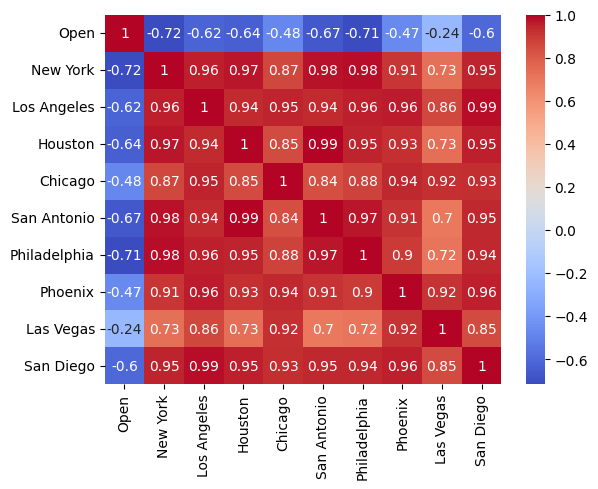

In [48]:
corr_matrix = top_condos_by_bond.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig("30_bond_vs_homeprice_cities.png")


Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-31  1360.160034  1394.479980  1350.140015  1394.459961  1394.459961   
2000-02-29  1348.050049  1369.630005  1348.050049  1366.420044  1366.420044   
2000-03-31  1487.920044  1519.810059  1484.380005  1498.579956  1498.579956   
2000-04-30  1464.920044  1473.619995  1448.150024  1452.430054  1452.430054   
2000-05-31  1422.439941  1434.489990  1415.500000  1420.599976  1420.599976   
...                 ...          ...          ...          ...          ...   
2023-03-31  4056.179932  4110.750000  4056.179932  4109.310059  4109.310059   
2023-04-30  4129.629883  4170.060059  4127.180176  4169.479980  4169.479980   
2023-05-31  4190.740234  4195.439941  4166.149902  4179.830078  4179.830078   
2023-06-30  4422.439941  4458.479980  4422.439941  4450.379883  4450.379883   
2023-07-31  4565.750000  4590.160156  4564.009766  4582.229980  4582.229980   

                Volume  
Date                    
2000-01-31   993800000  
2000-02-29  1204300000  
2000-03-31  1227400000  
2000-04-30   984600000  
2000-05-31   960500000  
...                ...  
2023-03-31  4525120000  
2023-04-30  4087800000  
2023-05-31  5980670000  
2023-06-30  3923450000  
2023-07-31  3981010000  

[283 rows x 6 columns]

In [64]:
sp500.reset_index(inplace=True)

In [66]:
sp500 = sp500.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

Date         Open
0   2000-01-31  1360.160034
1   2000-02-29  1348.050049
2   2000-03-31  1487.920044
3   2000-04-30  1464.920044
4   2000-05-31  1422.439941
..         ...          ...
278 2023-03-31  4056.179932
279 2023-04-30  4129.629883
280 2023-05-31  4190.740234
281 2023-06-30  4422.439941
282 2023-07-31  4565.750000

[283 rows x 2 columns]

In [75]:
condos_by_sp500 = pd.concat([condos, sp500], axis=1, join='inner')


date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas       Date         Open  
0    217916.040239   93906.833661 2000-01-31  1360.160034  
1    218923.103357   93968.439991 2000-02-29  1348.050049  
2    220075.230069   94002.823251 2000-03-31  1487.920044  
3    222681.763640   94118.669283 2000-04-30  1464.920044  
4    225453.301006   94319.615262 2000-05-31  1422.439941  
..             ...            ...        ...          ...  
277  915736.250391  311809.279260 2023-02-28  3977.189941  
278  915980.415824  311597.388822 2023-03-31  4056.179932  
279  920086.263076  311136.937680 2023-04-30  4129.629883  
280  927256.147270  311215.969480 2023-05-31  4190.740234  
281  937452.776699  311880.260441 2023-06-30  4422.439941  

[282 rows x 13 columns]

In [77]:
condos_by_sp500 = condos_by_sp500.drop(['Date'], axis=1)

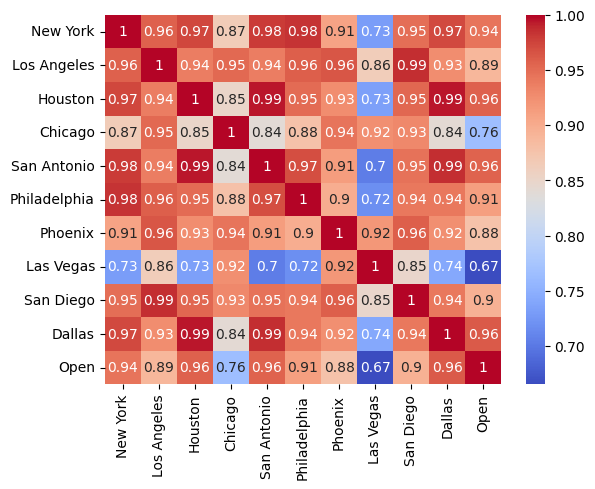

In [80]:
corr_matrix = condos_by_sp500.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('sp500_vs_homeprice_cities.png')

In [83]:
data.reset_index(inplace=True)

In [84]:
gold = data.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [89]:
gold_by_condos = pd.concat([gold, condos], axis=1, join='inner')
gold_by_condos = gold_by_condos.drop(['date'], axis=1)

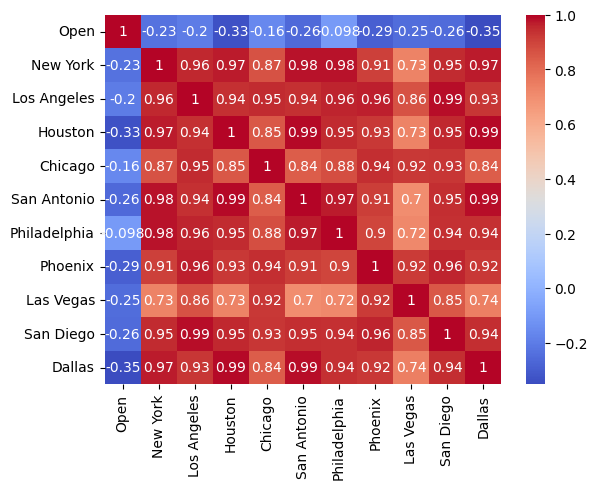

In [91]:
corr_matrix = gold_by_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('gold_by_condos.png')

In [114]:
filepath = Path('corporate_liquidity (1).csv')
corp_liquid = pd.read_csv(filepath)
corp_liquid.rename(columns={'date': 'Date'}, inplace=True)

In [123]:
filepath = Path('effective_rate (1).csv')
eff_rate = pd.read_csv(filepath)
eff_rate.rename(columns={'date': 'Date'}, inplace=True)

In [136]:
filepath = Path('CPI.csv')
cpi = pd.read_csv(filepath)
cpi.rename(columns={'date': 'Date'}, inplace=True)

In [125]:
corp_liquid_condos = pd.concat([condos, corp_liquid], axis=1, join='inner')
corp_liquid_condos.drop(['Date'], axis=1)

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas  corporate_liquidity  
0    217916.040239   93906.833661              38652.0  
1    218923.103357   93968.439991                  NaN  
2    220075.230069   94002.823251                  NaN  
3    222681.763640   94118.669283                  NaN  
4    225453.301006   94319.615262              33594.0  
..             ...            ...                  ...  
277  915736.250391  311809.279260            3531368.0  
278  915980.415824  311597.388822            3529204.0  
279  920086.263076  311136.937680            3494827.0  
280  927256.147270  311215.969480            3679896.0  
281  937452.776699  311880.260441            3592080.0  

[282 rows x 12 columns]

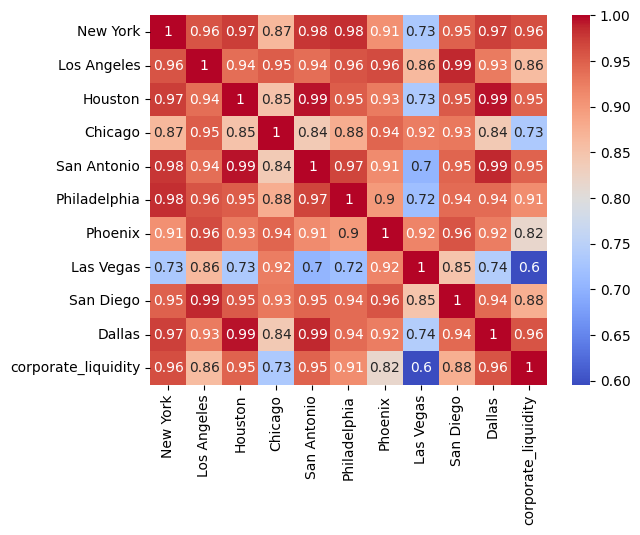

In [126]:
corr_matrix = corp_liquid_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('lqd_assets_v_homeprices.png')

In [129]:
er_condos = pd.concat([condos, eff_rate], axis=1, join='inner')
er_condos.drop(['Date'], axis=1)

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas  effective_rate  
0    217916.040239   93906.833661            0.80  
1    218923.103357   93968.439991            1.22  
2    220075.230069   94002.823251            1.07  
3    222681.763640   94118.669283            0.85  
4    225453.301006   94319.615262            0.83  
..             ...            ...             ...  
277  915736.250391  311809.279260            5.90  
278  915980.415824  311597.388822            6.14  
279  920086.263076  311136.937680            6.47  
280  927256.147270  311215.969480            6.51  
281  937452.776699  311880.260441            6.56  

[282 rows x 12 columns]

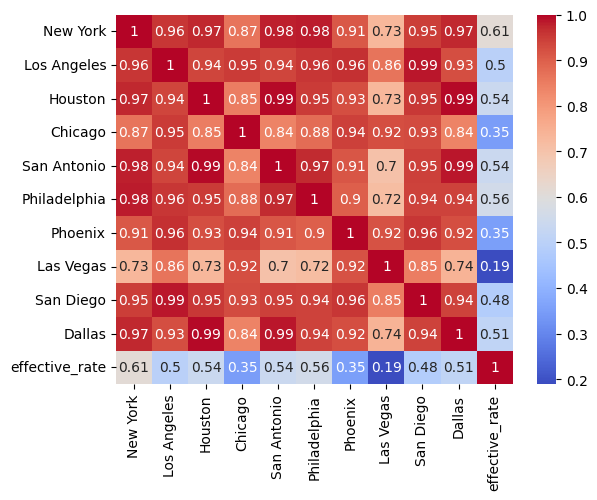

In [131]:
corr_matrix = er_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('hvalues_vs_ER.png')

In [137]:
cpi_condos = pd.concat([condos, cpi], axis=1, join='inner')
cpi_condos.drop(['Date'], axis=1)

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas    CPI  
0    217916.040239   93906.833661  21.48  
1    218923.103357   93968.439991  21.62  
2    220075.230069   94002.823251  22.00  
3    222681.763640   94118.669283  22.00  
4    225453.301006   94319.615262  21.95  
..             ...            ...    ...  
277  915736.250391  311809.279260  38.10  
278  915980.415824  311597.388822  38.30  
279  920086.263076  311136.937680  38.50  
280  927256.147270  311215.969480  38.60  
281  937452.776699  311880.260441  38.80  

[282 rows x 12 columns]

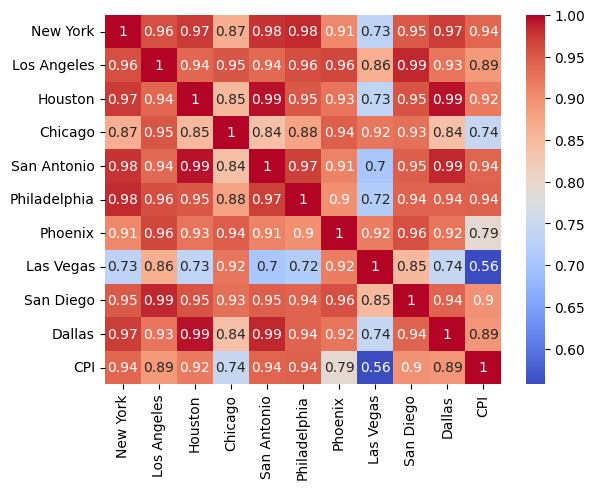

In [138]:
corr_matrix = cpi_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('cpi_v_homeprices.png')